In [2]:
# import所有的库
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from BalancedBinaryClassifier import *
from fsutils import *
from sklearn.model_selection import StratifiedShuffleSplit,cross_validate
import pickle
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.utils import resample
from copy import copy
import re
from gget import info
from tqdm import *

In [4]:
# 读取数据
expression_data = pd.read_csv("D:/cfRNA/count.matrix.long.tmm.txt", sep='\t', index_col=0)
metadata = pd.read_csv("D:/cfRNA/metadata.long.txt", sep='\t', index_col=0)

In [6]:
# 将表达矩阵处理成机器学习模型可接受的形式
expression_data = expression_data.T
expression_data = expression_data.rename(index=lambda x: x.replace('.', '-'))
expression_data

,ENSG00000000419.14,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.15,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,...,ENSG00000288699.1,ENSG00000288700.1,ENSG00000288701.1,ENSG00000288706.1,ENSG00000288710.1,ENSG00000288711.1,ENSG00000288715.1,ENSG00000288721.1,ENSG00000288722.1,ENSG00000288725.1
CRC-2124325,7.937089,6.938523,42.790609,65.271865,9.382069,15.471209,13.444409,40.735181,11.665537,8.862630,...,44.355776,28.149380,104.242958,274.305261,23.787968,4.844727,27.573246,8.087834,15.268879,77.484015
CRC-2211756,9.216498,13.914262,0.872709,55.480798,9.174142,25.155104,16.014819,16.261184,34.554854,5.228709,...,69.917211,64.140591,95.811515,463.678213,17.432962,10.464051,26.890270,11.337140,8.259588,65.066687
CRC-2276341,13.671220,15.111175,90.857494,41.896968,11.347045,17.943033,27.318807,83.326992,23.189743,5.259279,...,60.424252,31.726066,142.115090,110.963671,20.883730,8.332265,39.556644,17.206691,10.066326,69.182454
CRC-2277930,9.523920,6.858212,47.412140,35.159552,11.857270,15.627383,16.643402,32.859075,14.771016,4.884819,...,69.827162,24.319902,76.467380,351.206160,16.405079,8.372434,30.950661,8.305099,9.178289,77.257266
CRC-2280766,5.481111,8.488166,29.185337,46.618275,4.190765,60.859169,17.167177,23.451480,23.232760,5.497782,...,52.061208,51.605506,92.426326,518.911627,30.457530,10.356569,26.925608,6.825852,0.664858,57.956731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAD-2416507,9.474791,11.775569,35.743704,47.231366,16.361408,19.762046,12.625451,65.459525,22.019568,12.343147,...,47.649227,30.101573,104.218253,345.781522,24.531175,6.955647,48.844804,12.085546,10.491700,81.017977
STAD-2418352,11.641505,10.584110,16.099911,49.580674,17.101284,20.356570,19.525329,19.288127,20.101530,9.298216,...,55.313202,31.255000,104.937254,133.005591,20.838755,8.383940,28.562602,10.963428,12.400990,59.553879
STAD-2418587,11.068458,5.130518,77.881366,56.871822,4.698462,17.722154,12.406045,23.126743,19.071850,1.828566,...,48.434583,35.938477,70.913808,326.958608,21.743407,5.502420,14.915255,7.181526,11.407513,59.282281
STAD-2418777,10.777713,7.195909,27.342174,36.236259,11.010843,11.371300,17.164898,33.137621,26.303889,7.714451,...,67.828108,40.142153,120.196583,311.391284,15.299845,7.806749,89.517090,11.858243,13.972869,36.941065


In [8]:
# scaling
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(expression_data)
scaled_expression_data = pd.DataFrame(scaled_data, columns = expression_data.columns, index = expression_data.index)
scaled_expression_data

,ENSG00000000419.14,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.15,ENSG00000001461.17,ENSG00000001497.18,ENSG00000001561.7,...,ENSG00000288699.1,ENSG00000288700.1,ENSG00000288701.1,ENSG00000288706.1,ENSG00000288710.1,ENSG00000288711.1,ENSG00000288715.1,ENSG00000288721.1,ENSG00000288722.1,ENSG00000288725.1
CRC-2124325,-0.807191,-0.492332,-0.267752,0.795692,-0.225401,-0.029932,-0.590793,0.724673,-0.687719,0.803635,...,-0.442721,-0.455702,0.624324,-0.825770,0.705757,-0.601612,-0.339385,-0.322466,0.513770,0.815512
CRC-2211756,-0.510821,0.749429,-1.908438,0.387124,-0.266823,1.093310,-0.206638,-0.783008,1.297197,-0.205204,...,1.321259,2.411833,0.327129,0.708422,-0.307552,0.908937,-0.390928,0.107557,-0.697925,0.160692
CRC-2276341,0.521100,0.962493,1.613607,-0.179712,0.166049,0.256777,1.482774,3.348473,0.311637,-0.196718,...,0.666155,-0.170736,1.959256,-2.149072,0.242675,0.335885,0.564986,0.884351,-0.385595,0.377734
CRC-2277930,-0.439608,-0.506628,-0.086864,-0.460856,0.267693,-0.011817,-0.112694,0.239478,-0.418418,-0.300674,...,1.315044,-0.760808,-0.354721,-0.202763,-0.471448,0.346682,-0.084496,-0.293713,-0.539110,0.803555
CRC-2280766,-1.376110,-0.216478,-0.800269,0.017302,-1.259580,5.234652,-0.034415,-0.340062,0.315368,-0.130505,...,0.089026,1.413123,0.207807,1.155892,1.769223,0.880044,-0.388261,-0.489481,-2.010825,-0.214247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAD-2416507,-0.450988,0.368717,-0.543572,0.042885,1.164978,0.467765,-0.713188,2.247776,0.210162,1.769887,...,-0.215442,-0.300164,0.623453,-0.246710,0.824262,-0.034169,1.265951,0.206603,-0.312060,1.001873
STAD-2418352,0.050923,0.156624,-1.312439,0.140919,1.312372,0.536725,0.318018,-0.596538,0.043834,0.924561,...,0.313445,-0.208267,0.648797,-1.970500,0.235504,0.349776,-0.264720,0.058099,0.017998,-0.130023
STAD-2418587,-0.081821,-0.814177,1.105716,0.445169,-1.158439,0.231157,-0.745979,-0.360066,-0.045458,-1.149143,...,-0.161245,0.164881,-0.550475,-0.399203,0.379751,-0.424815,-1.294666,-0.442410,-0.153744,-0.144345
STAD-2418777,-0.149171,-0.446514,-0.872411,-0.415926,0.099073,-0.505484,-0.034755,0.256637,0.581690,0.484881,...,1.177091,0.499801,1.186664,-0.525320,-0.647678,0.194619,4.335433,0.176521,0.289729,-1.322496


In [10]:
metadata

,label,source,sex,library,dataset
sample_id,,,,,
CRC-2124325,CRC,P1,M,reverse,train
CRC-2211756,CRC,P1,M,reverse,train
CRC-2276341,CRC,P1,F,reverse,test
CRC-2277930,CRC,P1,M,reverse,train
CRC-2280766,CRC,P1,M,forward,train
...,...,...,...,...,...
STAD-2416507,STAD,P1,M,reverse,test
STAD-2418352,STAD,P1,M,reverse,test
STAD-2418587,STAD,P1,M,reverse,test


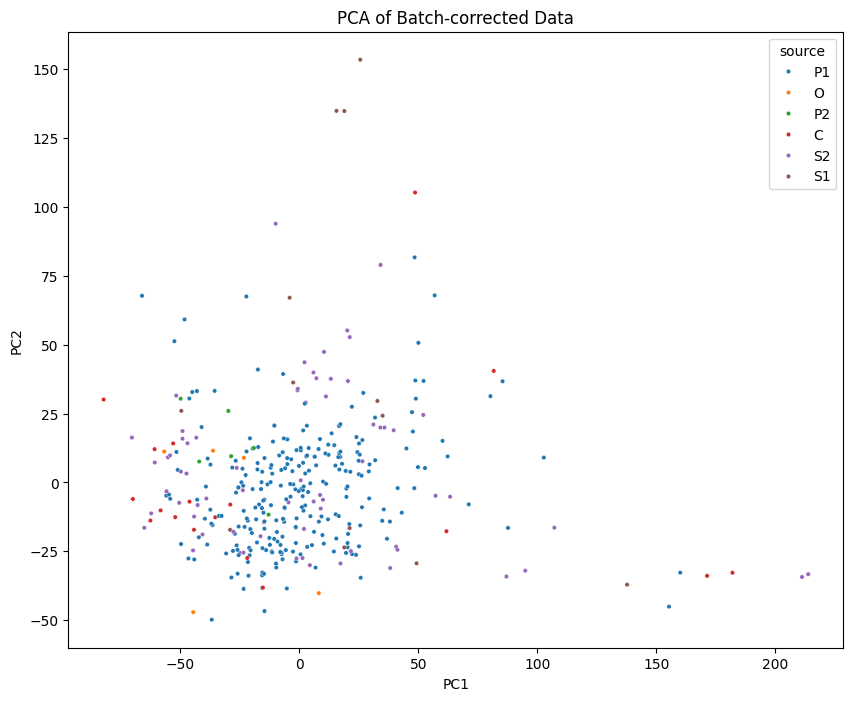

In [12]:
# 降维可视化
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_expression_data)

# 可视化，标记不同source
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=metadata['source'], s=10)
plt.title('PCA of Batch-corrected Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
# 数据集拆分（按照metadata划分）
X = np.array(scaled_expression_data.copy())
y = np.array(metadata.copy().loc[:, 'label'])
train_index = metadata[metadata['dataset'] == 'train'].index
test_index = metadata[metadata['dataset'] == 'test'].index
X_train = scaled_expression_data.loc[train_index]
y_train = metadata.loc[train_index, 'label']
X_test = scaled_expression_data.loc[test_index]
y_test = metadata.loc[test_index, 'label']
# 简单二分类：患病标记为1，健康标记为0。
y_train[y_train != 'NC'] = 1
y_test[y_test != 'NC'] = 1
y_train[y_train == 'NC'] = 0
y_test[y_test == 'NC'] = 0
# y_train[y_train != 'NC'] = 'cancer'
# y_test[y_test != 'NC'] = 'cancer'
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [69]:
# X = np.array(scaled_expression_data.copy())
# y = np.array(metadata.copy().loc[:, 'label'])
# # y[y != 'NC'] = 'cancer'
# y[y != 'NC'] = int(1)
# y[y == 'NC'] = int(0)
# y = y.astype(int)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [16]:
i = 0
def _my_scorer(clf, X_val, y_true_val):  
    #global fout
    global i
    # do all the work and return some of the metrics
    y_pred_val = clf.predict_proba(X_val)[:,1]
    accuracy = metrics.roc_auc_score(y_true_val,y_pred_val)
    #print("\t".join(params)+"\troc_auc:{}".format(accuracy))
    i += 1
    print("cross validation: {}".format(str(i).zfill(3)))
    #print("{}\tcross_validation\t{}".format(str(i).zfill(3),accuracy),file=fout,sep="\t")
    print("{}\tcross_validation\t{}".format(str(i).zfill(3),accuracy))
    return accuracy

In [18]:
def autoTune(estimator,X,y,params_grid):
    """
    使用 GridSearchCV 在给定的 param_grid 上做超参数搜索，以 roc_auc 作为评分指标，
    并返回最佳参数对应的模型（best_estimator_）。
    """
    cv = GridSearchCV(estimator, 
                      params_grid,
                      scoring='roc_auc',
                      refit=True,
                      cv=StratifiedKFold(shuffle=True,random_state=777))
    cv.fit(X,y)
    print(cv.best_params_)         # 打印最优参数
    return cv.best_estimator_      # 返回最优模型

In [20]:
# 模型训练
X_train = np.array(X_train)
y_train = np.array(y_train)
clf = BalancedBinaryClassifier(trend="both",space_mask=None,selector=rankSURF)
#splitter = StratifiedShuffleSplit(n_splits=100,test_size=0.2,random_state=666)
splitter = StratifiedShuffleSplit(n_splits=100,test_size=0.2,random_state=777)
cv = cross_validate(clf,X_train,y_train,return_estimator=True,scoring=_my_scorer,cv=splitter,verbose=4,n_jobs=1, error_score='raise')
feature_counts = np.zeros(X_train.shape[1])

cross validation: 001
001	cross_validation	0.9168399168399168
[CV] END ......................................., score=0.917 total time=   6.6s
cross validation: 002
002	cross_validation	0.8711018711018711
[CV] END ......................................., score=0.871 total time=   6.0s
cross validation: 003
003	cross_validation	0.7120582120582121
[CV] END ......................................., score=0.712 total time=   6.2s
cross validation: 004
004	cross_validation	0.8555093555093556
[CV] END ......................................., score=0.856 total time=   6.1s
cross validation: 005
005	cross_validation	0.6954261954261954
[CV] END ......................................., score=0.695 total time=   6.1s
cross validation: 006
006	cross_validation	0.8419958419958421
[CV] END ......................................., score=0.842 total time=   6.4s
cross validation: 007
007	cross_validation	0.9386694386694386
[CV] END ......................................., score=0.939 total time=   5.9s

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:  2.5min


cross validation: 025
025	cross_validation	0.8555093555093555
[CV] END ......................................., score=0.856 total time=   5.9s
cross validation: 026
026	cross_validation	0.7775467775467776
[CV] END ......................................., score=0.778 total time=   6.0s
cross validation: 027
027	cross_validation	0.7713097713097713
[CV] END ......................................., score=0.771 total time=   6.2s
cross validation: 028
028	cross_validation	0.8669438669438668
[CV] END ......................................., score=0.867 total time=   5.9s
cross validation: 029
029	cross_validation	0.6923076923076923
[CV] END ......................................., score=0.692 total time=   6.0s
cross validation: 030
030	cross_validation	0.8367983367983368
[CV] END ......................................., score=0.837 total time=   6.0s
cross validation: 031
031	cross_validation	0.818087318087318
[CV] END ......................................., score=0.818 total time=   6.2s


[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed: 10.0min


cross validation: 098
098	cross_validation	0.9137214137214137
[CV] END ......................................., score=0.914 total time=   6.1s
cross validation: 099
099	cross_validation	0.9012474012474012
[CV] END ......................................., score=0.901 total time=   6.0s
cross validation: 100
100	cross_validation	0.8617463617463618
[CV] END ......................................., score=0.862 total time=   6.1s


In [ ]:
# for estimator in cv['estimator']:
#     features = estimator.features
#     feature_counts[features] += 1
#     features_ = [str(x) for x in features]
#     if args.cv_features is not None:
#         out_cv_features.write("\t".join(features_)+"\n")
# if args.cv_features is not None:
#     out_cv_features.close()
# if args.trend == "both_balance":
#     posMean = X.loc[pos_ids_train+pos_ids_test,:].mean(axis=0).values
#     negMean = X.loc[neg_ids_train+neg_ids_test,:].mean(axis=0).values
#     upFreq = feature_counts.copy()
#     upFreq[np.where((posMean-negMean)<0)[0]] = 0 
#     downFreq = feature_counts.copy()
#     downFreq[np.where((posMean-negMean)>0)[0]] = 0
#     features = np.array(list(upFreq.argsort()[::-1][:5]) + list(downFreq.argsort()[::-1][:5]))
    
# else:
#     features = feature_counts.argsort()[::-1][:10]

In [22]:
feature_counts = np.zeros(X_train.shape[1])
for estimator in cv['estimator']:
    features = estimator.features
    feature_counts[features] += 1

# 按上下调选择特征上调和下调各选择十个
neg_index = metadata[metadata['label'] == 'NC'].index
pos_index = metadata[metadata['label'] != 'NC'].index
posMean = scaled_expression_data.loc[pos_index, :].mean(axis=0).values
negMean = scaled_expression_data.loc[neg_index, :].mean(axis=0).values
upFreq = feature_counts.copy()
upFreq[np.where((posMean-negMean)<0)[0]] = 0 
downFreq = feature_counts.copy()
downFreq[np.where((posMean-negMean)>0)[0]] = 0
features = np.array(list(upFreq.argsort()[::-1][:10]) + list(downFreq.argsort()[::-1][:10]))
# features = feature_counts.argsort()[::-1][:10]
features

array([5932, 5532, 4634, 1143, 8708, 5210, 4353, 3409, 6831,  969, 9511,
       5499, 9177, 8049, 1563, 1273, 2921, 6272, 4794, 6298])

[[ 6.92663779e-01  3.37679154e-01  2.99118519e-01  4.52981922e-01
   4.97985282e-01  3.49531638e-01  2.96159561e-01  8.06578008e-01
   8.32678567e-01 -2.85014445e-04 -2.36046476e-01 -2.69932533e-01
   3.67243431e-01  3.64865321e-01 -7.83278755e-01 -1.92588627e-01
  -3.84643154e-01 -5.86396878e-01 -3.91097167e-01 -4.79122626e-02]
 [ 2.11834387e+00  1.79185251e+00  1.67010223e+00  1.02070795e+00
   1.77397388e+00  1.92674098e+00  4.10681878e+00  2.29531114e+00
  -5.29562351e-01  2.39218219e+00  1.54135564e+00  1.33057432e+00
  -1.36740754e-01 -1.50231557e-01  3.45394415e-01  6.72465170e-01
   5.41385255e-01  3.63741344e-01  4.57911892e-01 -2.35591811e+00]
 [ 8.52551617e-02 -4.21594108e-01 -1.71872187e-01  3.34207930e-01
   2.24816091e-01  1.46306125e-01  6.64441830e-02 -1.60248016e-01
  -1.68769913e-01  3.13337150e-01  4.98752190e-01  3.36536290e-01
   4.70008408e-01  4.59516114e-01  6.50002459e-01  6.69148075e-01
   3.64881798e-01  8.94202298e-01  9.89641648e-01 -7.33623982e-01]
 [ 5.03

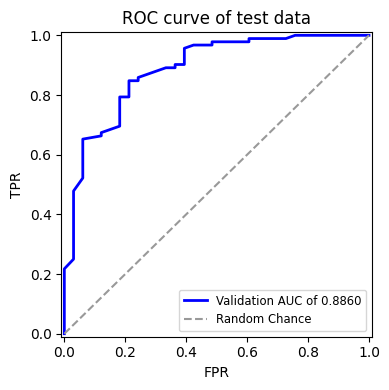

In [24]:
# 在选出的feature上绘制ROC曲线评估测试集的表现
X_test = np.array(X_test)
y_test = np.array(y_test)
# 用 BalancedRandomForestClassifier 再训练一个模型，并用网格搜索调参
clf2 = BalancedRandomForestClassifier(n_estimators=100,random_state=666)
grid = {"max_depth":[2,4,8,16,None]}  # 定义需要搜索的 max_depth 候选值
print(X_test[:,features][:4,:])       # 测试集中选出的特征前几行，调试打印

# 在训练集上自动调参，并得到调参后的最佳模型
clf2 = autoTune(clf2, X_train[:,features], y_train, grid) 
    
# 在测试集上预测，计算并打印 ROC-AUC
y_pred = clf2.predict_proba(X_test[:,features])[:,1]
    # print("ROC-AUC on test set")
    # print("full-training-set\ttest_set\t{}".format(metrics.roc_auc_score(y_test,y_pred)),
    #       sep="\t",file=fout)
    
    # # 保存 ROC 曲线数据到文件
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred)
AUROC = auc(fpr, tpr)
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, '-', color = 'b', label='Validation AUC of {:.4f}'.format(AUROC), lw=2)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random Chance')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve of test data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best',fontsize='small')
plt.tight_layout()
plt.show()
plt.close()

In [26]:
# 将基因编号替换为名称
selected_data = scaled_expression_data.iloc[:,features]
ensembl_ids = [re.sub(r"\..*", "", id) for id in selected_data.columns]
gene_mapping = {}


for ensembl_id in tqdm(ensembl_ids):
    # ensembl_id = ensembl_ids[i]
    result = info(ensembl_id)  # 查询 Ensembl 数据库
    if result.loc[ensembl_id,'ensembl_gene_name']:
        gene_mapping[ensembl_id] = result.loc[ensembl_id,'ensembl_gene_name']
    else:
        gene_mapping[ensembl_id] = ensembl_id # 如果找不到则不替换


gene_names = [gene_mapping[re.sub(r"\..*", "", id)] for id in selected_data.columns]
selected_data.columns = gene_names
selected_data

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [02:29<00:00,  7.46s/it]


,NDRG2,NFIA,MYO10,PITPNM3,TNFRSF13B,RPGR,PELP1,AFDN,MYO1D,MECOM,SENP3-EIF4A1,EIF4A1,NaN,CSNK2B,CORO1A,EIF3L,SASH3,SLC25A6,RPL7A,SIN3A
CRC-2124325,-0.530932,0.209590,-0.463391,-0.377930,-0.505358,-0.491798,-0.451126,-0.334590,-0.650650,-0.369061,0.292348,0.352538,-0.241854,-0.196974,0.441953,0.243233,0.492119,0.294149,0.249544,-0.249276
CRC-2211756,0.560427,0.368878,0.661075,0.537265,0.466578,0.670094,0.782294,1.158137,-0.409092,0.742748,0.986382,0.807653,-0.374613,-0.390072,0.390439,0.510656,0.483966,0.785707,0.795615,-1.582529
CRC-2276341,0.692664,0.337679,0.299119,0.452982,0.497985,0.349532,0.296160,0.806578,0.832679,-0.000285,-0.236046,-0.269933,0.367243,0.364865,-0.783279,-0.192589,-0.384643,-0.586397,-0.391097,-0.047912
CRC-2277930,-0.153670,-0.121326,-0.312959,0.052688,-0.016817,-0.157658,-0.028285,0.104346,0.081388,-0.156599,-0.676816,-0.661041,-0.868109,-0.855784,-0.501584,-0.313425,-0.594988,-0.320984,-0.494335,-0.691246
CRC-2280766,-1.102494,2.407809,0.414554,-0.535484,-0.624556,-0.257780,-0.413523,-0.382478,0.296098,-0.246312,1.226461,1.165586,-0.835169,-0.880680,-0.357923,0.180894,3.065565,0.339125,0.888333,0.472860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAD-2416507,0.202712,0.299556,0.149354,-0.179483,-0.242670,-0.303613,-0.029777,0.709105,0.850305,-0.107930,-0.529391,-0.485043,-0.244423,-0.203282,-0.245710,-0.419760,-0.212945,-0.544507,-0.463911,-0.201138
STAD-2418352,0.125372,0.271556,0.402860,0.181183,0.053243,0.083113,0.024254,0.382169,-0.147784,0.037844,0.370977,0.334218,0.682353,0.670650,0.347486,0.176976,0.186882,0.064877,0.029186,0.077945
STAD-2418587,-0.151196,-0.093866,1.206444,-0.245349,-0.422908,-0.407896,-0.386557,0.638781,0.395057,0.074015,0.427186,0.303831,0.374429,0.349016,0.512915,0.346141,0.118821,0.112416,0.036918,0.821913
STAD-2418777,0.176217,-0.354214,0.357044,-0.517501,-0.274719,-0.309242,-0.200970,0.438044,-0.124777,-0.556820,-0.590639,-0.508744,-1.029266,-1.062355,-0.081572,-0.620172,-0.640399,-0.722596,-1.092340,0.783571


In [28]:
# 保存选出的特征
selected_data.to_csv('D:/cfRNA/selected_data_long.txt', sep='\t')